In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("musk_csv.csv")
data.tail(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [3]:
data.drop(["ID", "molecule_name" ,"conformation_name"],axis=1,inplace=True)
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,51,-123,-23,-108,-117,134,-160,82,-230,-28,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,44,-104,-19,-105,-117,142,-165,68,-225,-32,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,44,-102,-19,-104,-117,72,-165,65,-219,-12,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,51,-121,-23,-106,-117,63,-161,79,-224,-30,...,86,99,-14,-31,106,171,-44,-116,117,0


In [4]:
X = data.drop(["class"],axis=1)
Y = data["class"]

In [5]:
X = np.array(X)
Y= np.array(Y)
print(X.shape)
print(Y.shape)
x_train,x_test,y_train,y_test = train_test_split(X , Y , test_size = 0.2)
x_train.shape,x_test.shape

(6598, 166)
(6598,)


((5278, 166), (1320, 166))

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(166,activation='sigmoid'))
model.add(tf.keras.layers.Dense(300, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [7]:
#For epochs=8:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8,validation_split=0.2, shuffle=True)


Train on 4222 samples, validate on 1056 samples
Epoch 1/8
4222/4222 [==============================] - 4s 1ms/sample - loss: 0.3950 - accuracy: 0.8468 - val_loss: 0.3103 - val_accuracy: 0.8902
Epoch 2/8
4222/4222 [==============================] - 0s 116us/sample - loss: 0.2862 - accuracy: 0.8937 - val_loss: 0.2538 - val_accuracy: 0.9119
Epoch 3/8
4222/4222 [==============================] - 0s 106us/sample - loss: 0.2482 - accuracy: 0.9062 - val_loss: 0.2048 - val_accuracy: 0.9214
Epoch 4/8
4222/4222 [==============================] - 1s 133us/sample - loss: 0.2141 - accuracy: 0.9221 - val_loss: 0.2105 - val_accuracy: 0.9233
Epoch 5/8
4222/4222 [==============================] - 0s 108us/sample - loss: 0.2092 - accuracy: 0.9214 - val_loss: 0.2109 - val_accuracy: 0.9214
Epoch 6/8
4222/4222 [==============================] - 0s 101us/sample - loss: 0.2123 - accuracy: 0.9216 - val_loss: 0.1949 - val_accuracy: 0.9261
Epoch 7/8
4222/4222 [==============================] - 0s 107us/sample -

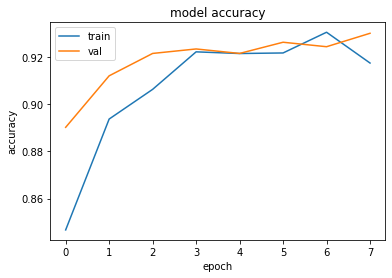

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

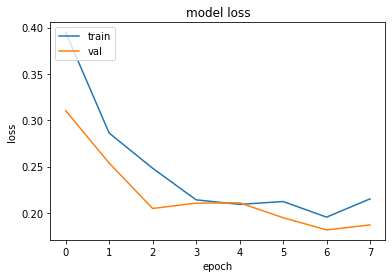

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.evaluate(x_test,y_test,verbose=2)

1320/1 - 0s - loss: 0.1868 - accuracy: 0.9068


[0.22186330900047765, 0.9068182]

In [11]:
#For epochs=500:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=500,validation_split=0.2, shuffle=True)

Train on 4222 samples, validate on 1056 samples
Epoch 1/500
4222/4222 [==============================] - 3s 789us/sample - loss: 0.1944 - accuracy: 0.9261 - val_loss: 0.1700 - val_accuracy: 0.9337
Epoch 2/500
4222/4222 [==============================] - 1s 124us/sample - loss: 0.1726 - accuracy: 0.9372 - val_loss: 0.1810 - val_accuracy: 0.9290
Epoch 3/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1556 - accuracy: 0.9413 - val_loss: 0.1741 - val_accuracy: 0.9413
Epoch 4/500
4222/4222 [==============================] - 1s 120us/sample - loss: 0.1710 - accuracy: 0.9356 - val_loss: 0.1875 - val_accuracy: 0.9384
Epoch 5/500
4222/4222 [==============================] - 0s 101us/sample - loss: 0.1821 - accuracy: 0.9334 - val_loss: 0.1639 - val_accuracy: 0.9299
Epoch 6/500
4222/4222 [==============================] - 0s 100us/sample - loss: 0.1673 - accuracy: 0.9415 - val_loss: 0.1928 - val_accuracy: 0.9356
Epoch 7/500
4222/4222 [==============================] - 0

4222/4222 [==============================] - 0s 107us/sample - loss: 0.1131 - accuracy: 0.9602 - val_loss: 0.1122 - val_accuracy: 0.9640
Epoch 56/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1126 - accuracy: 0.9612 - val_loss: 0.1267 - val_accuracy: 0.9508
Epoch 57/500
4222/4222 [==============================] - 0s 112us/sample - loss: 0.1154 - accuracy: 0.9559 - val_loss: 0.1237 - val_accuracy: 0.9555
Epoch 58/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1251 - accuracy: 0.9529 - val_loss: 0.1229 - val_accuracy: 0.9479
Epoch 59/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.1223 - accuracy: 0.9562 - val_loss: 0.1141 - val_accuracy: 0.9564
Epoch 60/500
4222/4222 [==============================] - 0s 114us/sample - loss: 0.1071 - accuracy: 0.9590 - val_loss: 0.1304 - val_accuracy: 0.9545
Epoch 61/500
4222/4222 [==============================] - 1s 123us/sample - loss: 0.1108 - accuracy: 0.9612 - val

4222/4222 [==============================] - 0s 109us/sample - loss: 0.1256 - accuracy: 0.9533 - val_loss: 0.1075 - val_accuracy: 0.9602
Epoch 110/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1215 - accuracy: 0.9564 - val_loss: 0.1355 - val_accuracy: 0.9441
Epoch 111/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.1328 - accuracy: 0.9517 - val_loss: 0.1560 - val_accuracy: 0.9394
Epoch 112/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1244 - accuracy: 0.9567 - val_loss: 0.1254 - val_accuracy: 0.9564
Epoch 113/500
4222/4222 [==============================] - 0s 107us/sample - loss: 0.1218 - accuracy: 0.9574 - val_loss: 0.1270 - val_accuracy: 0.9574
Epoch 114/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1193 - accuracy: 0.9557 - val_loss: 0.1228 - val_accuracy: 0.9583
Epoch 115/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.1190 - accuracy: 0.9564

4222/4222 [==============================] - 1s 133us/sample - loss: 0.1050 - accuracy: 0.9621 - val_loss: 0.1018 - val_accuracy: 0.9621
Epoch 164/500
4222/4222 [==============================] - 1s 144us/sample - loss: 0.1294 - accuracy: 0.9567 - val_loss: 0.1352 - val_accuracy: 0.9508
Epoch 165/500
4222/4222 [==============================] - 0s 113us/sample - loss: 0.1132 - accuracy: 0.9595 - val_loss: 0.1170 - val_accuracy: 0.9583
Epoch 166/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.1066 - accuracy: 0.9597 - val_loss: 0.1030 - val_accuracy: 0.9659
Epoch 167/500
4222/4222 [==============================] - 1s 135us/sample - loss: 0.0967 - accuracy: 0.9647 - val_loss: 0.1012 - val_accuracy: 0.9659
Epoch 168/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.0891 - accuracy: 0.9652 - val_loss: 0.1605 - val_accuracy: 0.9347
Epoch 169/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.0951 - accuracy: 0.9649

4222/4222 [==============================] - 0s 108us/sample - loss: 0.0895 - accuracy: 0.9673 - val_loss: 0.0912 - val_accuracy: 0.9631
Epoch 218/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1089 - accuracy: 0.9628 - val_loss: 0.1215 - val_accuracy: 0.9498
Epoch 219/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1071 - accuracy: 0.9578 - val_loss: 0.1471 - val_accuracy: 0.9422
Epoch 220/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1599 - accuracy: 0.9441 - val_loss: 0.1554 - val_accuracy: 0.9403
Epoch 221/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.1662 - accuracy: 0.9420 - val_loss: 0.1768 - val_accuracy: 0.9356
Epoch 222/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1819 - accuracy: 0.9370 - val_loss: 0.1641 - val_accuracy: 0.9413
Epoch 223/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.1365 - accuracy: 0.9538

4222/4222 [==============================] - 0s 109us/sample - loss: 0.0894 - accuracy: 0.9676 - val_loss: 0.0957 - val_accuracy: 0.9669
Epoch 272/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.0917 - accuracy: 0.9659 - val_loss: 0.0975 - val_accuracy: 0.9612
Epoch 273/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.0920 - accuracy: 0.9673 - val_loss: 0.1079 - val_accuracy: 0.9593
Epoch 274/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.0971 - accuracy: 0.9628 - val_loss: 0.1004 - val_accuracy: 0.9612
Epoch 275/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.0955 - accuracy: 0.9652 - val_loss: 0.0952 - val_accuracy: 0.9669
Epoch 276/500
4222/4222 [==============================] - 0s 107us/sample - loss: 0.0863 - accuracy: 0.9694 - val_loss: 0.0948 - val_accuracy: 0.9669
Epoch 277/500
4222/4222 [==============================] - 0s 111us/sample - loss: 0.0855 - accuracy: 0.9713

4222/4222 [==============================] - 1s 122us/sample - loss: 0.0698 - accuracy: 0.9725 - val_loss: 0.0935 - val_accuracy: 0.9688
Epoch 326/500
4222/4222 [==============================] - 1s 126us/sample - loss: 0.0673 - accuracy: 0.9721 - val_loss: 0.1018 - val_accuracy: 0.9688
Epoch 327/500
4222/4222 [==============================] - 1s 120us/sample - loss: 0.0737 - accuracy: 0.9713 - val_loss: 0.1078 - val_accuracy: 0.9621
Epoch 328/500
4222/4222 [==============================] - 1s 123us/sample - loss: 0.0747 - accuracy: 0.9706 - val_loss: 0.1089 - val_accuracy: 0.9640
Epoch 329/500
4222/4222 [==============================] - 1s 154us/sample - loss: 0.0820 - accuracy: 0.9664 - val_loss: 0.1064 - val_accuracy: 0.9631
Epoch 330/500
4222/4222 [==============================] - 1s 122us/sample - loss: 0.0867 - accuracy: 0.9612 - val_loss: 0.0994 - val_accuracy: 0.9631
Epoch 331/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.0850 - accuracy: 0.9631

4222/4222 [==============================] - 0s 118us/sample - loss: 0.0750 - accuracy: 0.9661 - val_loss: 0.1186 - val_accuracy: 0.9593
Epoch 380/500
4222/4222 [==============================] - 0s 114us/sample - loss: 0.0841 - accuracy: 0.9671 - val_loss: 0.1136 - val_accuracy: 0.9593
Epoch 381/500
4222/4222 [==============================] - 0s 114us/sample - loss: 0.1048 - accuracy: 0.9574 - val_loss: 0.1204 - val_accuracy: 0.9555
Epoch 382/500
4222/4222 [==============================] - 0s 114us/sample - loss: 0.0897 - accuracy: 0.9631 - val_loss: 0.1050 - val_accuracy: 0.9498
Epoch 383/500
4222/4222 [==============================] - 0s 113us/sample - loss: 0.0899 - accuracy: 0.9619 - val_loss: 0.1021 - val_accuracy: 0.9460
Epoch 384/500
4222/4222 [==============================] - 1s 119us/sample - loss: 0.0697 - accuracy: 0.9659 - val_loss: 0.1048 - val_accuracy: 0.9498
Epoch 385/500
4222/4222 [==============================] - 0s 115us/sample - loss: 0.0774 - accuracy: 0.9685

4222/4222 [==============================] - 0s 116us/sample - loss: 0.0574 - accuracy: 0.9732 - val_loss: 0.0926 - val_accuracy: 0.9574
Epoch 434/500
4222/4222 [==============================] - 0s 116us/sample - loss: 0.0575 - accuracy: 0.9725 - val_loss: 0.0794 - val_accuracy: 0.9669
Epoch 435/500
4222/4222 [==============================] - 0s 115us/sample - loss: 0.0559 - accuracy: 0.9718 - val_loss: 0.0824 - val_accuracy: 0.9697
Epoch 436/500
4222/4222 [==============================] - 0s 118us/sample - loss: 0.0554 - accuracy: 0.9721 - val_loss: 0.0888 - val_accuracy: 0.9564
Epoch 437/500
4222/4222 [==============================] - 1s 123us/sample - loss: 0.0536 - accuracy: 0.9730 - val_loss: 0.0843 - val_accuracy: 0.9564
Epoch 438/500
4222/4222 [==============================] - 1s 122us/sample - loss: 0.0553 - accuracy: 0.9725 - val_loss: 0.0867 - val_accuracy: 0.9706
Epoch 439/500
4222/4222 [==============================] - 1s 134us/sample - loss: 0.0575 - accuracy: 0.9723

4222/4222 [==============================] - 0s 116us/sample - loss: 0.1082 - accuracy: 0.9600 - val_loss: 0.1189 - val_accuracy: 0.9583
Epoch 488/500
4222/4222 [==============================] - 1s 121us/sample - loss: 0.1137 - accuracy: 0.9559 - val_loss: 0.1163 - val_accuracy: 0.9574
Epoch 489/500
4222/4222 [==============================] - 0s 117us/sample - loss: 0.1061 - accuracy: 0.9574 - val_loss: 0.0952 - val_accuracy: 0.9688
Epoch 490/500
4222/4222 [==============================] - 0s 117us/sample - loss: 0.0847 - accuracy: 0.9654 - val_loss: 0.0864 - val_accuracy: 0.9725
Epoch 491/500
4222/4222 [==============================] - 0s 118us/sample - loss: 0.0838 - accuracy: 0.9666 - val_loss: 0.0941 - val_accuracy: 0.9669
Epoch 492/500
4222/4222 [==============================] - 0s 117us/sample - loss: 0.0724 - accuracy: 0.9699 - val_loss: 0.0894 - val_accuracy: 0.9735
Epoch 493/500
4222/4222 [==============================] - 1s 120us/sample - loss: 0.0883 - accuracy: 0.9668

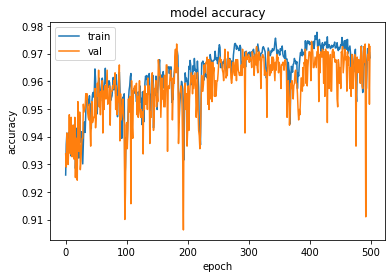

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

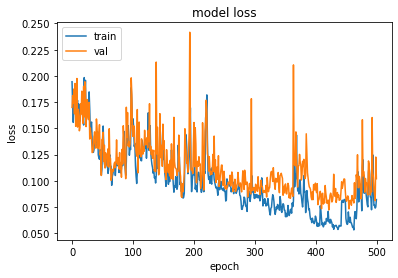

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
model.evaluate(x_test,y_test,verbose=2)

1320/1 - 0s - loss: 0.0658 - accuracy: 0.9477


[0.11915500528658882, 0.94772726]

In [15]:
model.save("Musk_NonMusk_Classification.h5")

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [17]:
yhat_probs = model.predict(x_test, verbose=0)

yhat_classes = model.predict_classes(x_test, verbose=0)

In [18]:
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [19]:
precision = precision_score(y_test, yhat_classes)
precision

0.9520958083832335

In [20]:
recall = recall_score(y_test, yhat_classes)
recall

0.7227272727272728

In [21]:
f1 = f1_score(y_test, yhat_classes)
f1

0.8217054263565892

In [61]:
accuracy = accuracy_score(y_test, yhat_classes)
accuracy

0.9174242424242425